# DC_Real Property Feature Scaling - Laura Adam

In this notebook, we will use the ]https://www.kaggle.com/christophercorrea/dc-residential-properties from Kaggle to practice how to scale feature data. Scaling means to change the range of values for the data so that features (columns) that have vastly different numerical ranges can be more easily compared. We will look at 2 types of scaling - z-score standardization and Min-max scaling.

Exercise Goal is  re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

Upload your notebook to your Github repository and submit the URL for this assignment.

In [1]:
#import Pandas module
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#making datafrom CSV file

filepath = "DC_Properties.csv"

DC_Properties_df = pd.read_csv(filepath)
DC_Properties_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
#check if any missing values in the data
DC_Properties_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [4]:
#Most columns have 158957 entries but PRICE only has 98216 entries 
#so we need to fill in the missing values.
#DC_Properties_df["PRICE"].fillna("NoPrice", inplace = True) 
Drop_df = DC_Properties_df["PRICE"].dropna()

In [5]:
#check if any missing values in the PRICE column
Drop_df.count()

98216

In [6]:
#descriptive statistics
Drop_df.describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

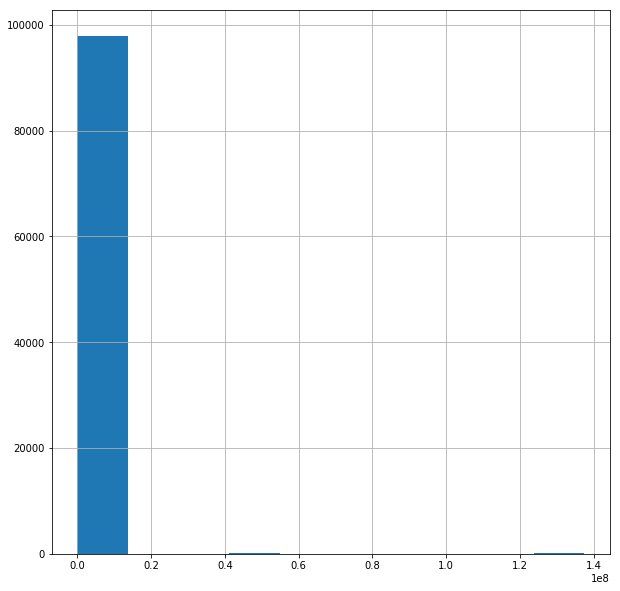

In [7]:
#plot the frequency count for each column
Drop_df.hist(figsize=(10,10))

We can see from the descriptive statistics and the frequency distribution plots that each feature (column) has varying ranges. Features such as Insulin have a high maximum value but other features like DiabetesPedigreeFunction have low maximum values.

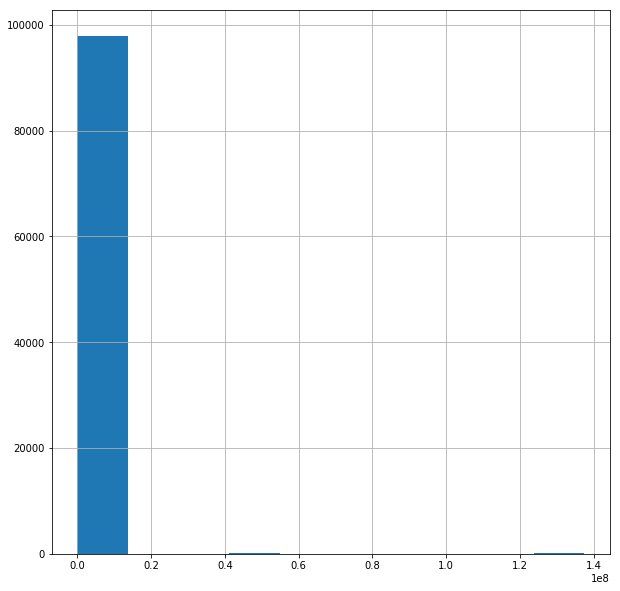

In [9]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
Drop_df.hist(figsize=(10,10))

**Scaling will help to find any drastic effects that occur in the data when comparing multiple features. If we try to see any effects when putting the features on the same scale in the default data, as in the above charts, smaller values cannot be seen.**

### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.
### \begin{align}  z = \frac{(value - mean)}{std dev} \end{align}

In [11]:
#first 5 rows of the 'Price' column
Drop_df.head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

In [12]:
#mean for the column
Drop_df.mean()


931351.5949336156

In [14]:
#Method 1: manual calculation of z-scores for 'Price' column

#mean for the column
mean = Drop_df.mean()

#standard deviation of the column
std = Drop_df.std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (Drop_df - mean)/std

In [15]:
#values for mean and standard deviation of 'Price column'
mean, std

(931351.5949336156, 7061324.955612032)

In [16]:
#first 5 rows of z-score standardized 'Price' column
price_z_manual.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

In [20]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Price' is in double set of square brackets in order to make it a dataframe
#price_zscore = scaler.fit_transform(Drop_df)
#glucose_zscore = scaler.fit_transform(pima_df[['Glucose']])

In [21]:
#mean and standard deviation of z-score standardized 'Price' column
price_zscore.mean(), price_zscore.std()

NameError: name 'price_zscore' is not defined

In [ ]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
prz_z_col = pd.Series(price_zscore.reshape(-1))

In [ ]:
#first 5 rows of z-score standardized pricecolumn
prz_z_col.head()

In [ ]:
#BEFORE: frequency count plot of 'Price' column
DC_Properties_df['PRICE'].hist()

In [ ]:
#AFTER: frequency count plot of 'Price' column (z-score standardization)
#range is much smaller
prz_z_col.hist()

In [ ]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(DC_Properties_df.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(Drop_df, columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

### Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [ ]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [ ]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
price_minmax = minmax_sc.fit_transform(DC_Properties_df[['PRICE']])

In [ ]:
#mean and standard deviation of Min-Max 'Glucose' column
price_minmax.mean(), price_minmax.std()

In [ ]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
prz_mm_col = pd.Series(price_minmax.reshape(-1))
prz_mm_col.head()

In [ ]:
#verify the range is between 0 and 1
prz_mm_col.min(), prz_mm_col.max()

In [ ]:
prz_mm_col.hist()

In [ ]:
#show min-max scaling for all columns

#calculate z-scores
minmax_df = pd.DataFrame(minmax_sc.fit_transform(DC_Properties_df), columns = colnames)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True)

### Tips for Predictive Models

- Z-score standardization is most useful for regression models, such as linear regression and logistic regression
- Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering